In [1]:
%pylab inline
import ThonkTools as TT
from uncertainties import unumpy as unp
from uncertainties import ufloat
from scipy import interpolate
from scipy.optimize import curve_fit
import pandas as pd
import peakutils
from peakutils.plot import plot as pplot

Populating the interactive namespace from numpy and matplotlib


In [2]:
def csvReader(x):
    """
        csvReader takes a csv file and creats a list with lists of the colloms.
        It also turns strings into numbers if possible.
    """
    import csv
    with open(x, 'r') as csvFile:
        reader = csv.reader(csvFile)
        l = None
        for row in reader:
            if l == None:
                l = [[] for i in range(len(row))]
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
            else:
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
    return l    
    csvFile.close()

In [424]:
def read(filename):
    from numpy import array as array
    df = pd.read_csv(filename,skiprows=1,names=["Width in A","Voltage in V"],sep="\t")
    data = [[],[]]

    for i in range(2):
        for k in range(len(df.iloc[0:,i])):
            data[i].append((df.iloc[k,i].replace(",",".")))
    for i in range(len(data)):
        for k in range(len(data[i])):
            try:
                #print(i,k, data[i][k])
                data[i][k] = float(data[i][k])
            except ValueError:
                data[i][k] = 0
    for i in range(len(data)):
        data[i]= array(data[i])
    return data
[pos, inte] = range(2)
data = read("abs30.csv")

In [425]:
def error(arr):
    arr_error = []
    arr_value = []
    for i in range(len(arr)):
        arr_error.append(arr[i].std_dev)
        arr_value.append(arr[i].nominal_value)
    return arr_error, arr_value

In [426]:
def Gaußfit_pm(x, y, p0=None):
    return TT.fit_pm(x, y, func=lambda x, A, s, c, d: A * (1 / (2 * pi * s**2)) * e**(-1/2 * ((x - c)/(s))**2) + d, p0=p0)

def Gaußfit(x, y, p0=None, r=None, d=None):
    return TT.fit(x, y, func=lambda x, A, s, c, d: A * (1 / (2 * pi * s**2)) * e**(-1/2 * ((x - c)/(s))**2) + d, r=r, d=d, p0=p0)

In [429]:
data1 = read('Eichung1.csv') #Nicht verwendet
data2 = read('Eichung2.csv')
data2 = [np.arange(4000,6022,2),data2[1]]

In [484]:
p0 = [300,20,4045,0]
xnew, ynew = Gaußfit(data2[0][:100],data2[1][:100],p0,d=(4000,4100))
para = Gaußfit_pm(data2[0][:100],data2[1][:100],p0)

p1 = [375824,30,4360,0]
xnew1,ynew1 = Gaußfit(data2[0][100:200],data2[1][100:200],p1,d=(4300,4410))
para1 = Gaußfit_pm(data2[0][100:200],data2[1][100:200],p1)

p2 = [375812,20,5480,0]
xnew2,ynew2 = Gaußfit(data2[0][700:800],data2[1][700:800],p2,d=(5410,5520))
para2 = Gaußfit_pm(data2[0][700:800],data2[1][700:800],p2) 

p3 = [375812,20,5760,0]
xnew3,ynew3 = Gaußfit(data2[0][800:1000],data2[1][800:1000],p3,d=(5710,5850))
para3 = Gaußfit_pm(data2[0][800:1000],data2[1][800:1000],p3)

print(para,'\n',para1,'\n',para2,'\n',para3)

(array([256778.52927314118+/-20753.481487095956,
       31.32719782619573+/-1.4077968806955892,
       4048.84993494857+/-0.5105784219022611,
       -0.12207061864863349+/-0.4924795315311461], dtype=object), 0.9036156393182908) 
 (array([375812.991280442+/-29378.875106354408,
       30.46727464925929+/-1.328521662937918,
       4359.923543166823+/-0.4839238313449833,
       -0.6680313793208161+/-0.726199790283897], dtype=object), 0.9086703807724643) 
 (array([427390.24959795864+/-34012.24003883088,
       28.24882661925052+/-1.2615552700100727,
       5464.5755401385895+/-0.46195240366460794,
       -0.9131551956262849+/-0.9386585728006668], dtype=object), 0.9053493554171268) 
 (array([570765.2088387003+/-28942.529051163052,
       41.01406377032906+/-1.192878322478724,
       5783.510873590287+/-0.4463559719628279,
       -0.34176580328595474+/-0.319492202533704], dtype=object), 0.9185921276889776)


In [492]:
x_c = np.array([para[0][2], para1[0][2], para2[0][2], para3[0][2]])
for i in range(4):
    print('{:L}'.format(x_c[i]))

4048.8 \pm 0.5
4359.9 \pm 0.5
5464.6 \pm 0.5
5783.5 \pm 0.4


In [507]:
a = (abs(4046.6-para[0][2]))
b = (abs(4358.5-para1[0][2]))
c = (abs(5460.7-para2[0][2]))
print(abs(5769.6-para3[0][2]))
print((5790.7-para3[0][2]))
l_sys = ((a+b+c)/3)
print(l_sys)

13.9+/-0.4
7.2+/-0.4
2.52+/-0.28


In [ ]:
404.66$&$4048.8 \pm 0.5
		\hline
		g-line&$435.85$&$4359.9 \pm 0.5$&\\
		\hline
		e-line&$546.07$&$5464.6 \pm 0.5$&\\
		\hline
		double line $1$&$576.96$&$5783.5 \pm 0.4$&\\
		\hline
		double line $2$&$579.07$&$5783.5 \pm 0.4$&\\
		\hline

256778.52927314118


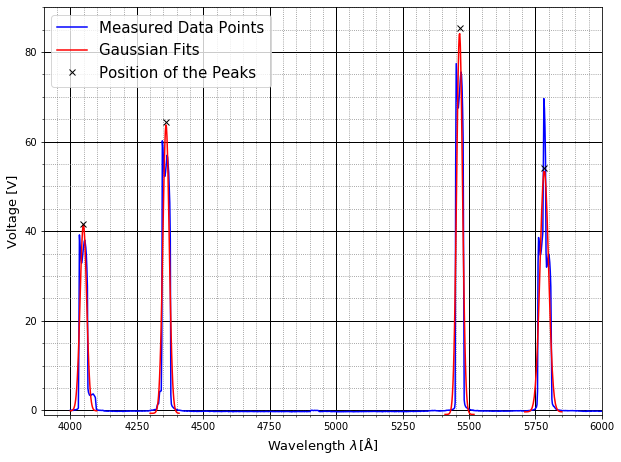

In [485]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot
pt = p1
x = np.arange(4300,4400,1)
#plt.plot(x,pt[0] * (1 / (2 * pi * pt[1]**2)) * e**(-1/2 * ((x - pt[2])/(pt[1]))**2) + pt[3],color='orange')
plt.plot(data2[0],data2[1],color='blue',label='Measured Data Points')
print(para[0][0].nominal_value)
plt.plot(xnew,ynew,color='red')
plt.plot(xnew1,ynew1,color='red')
plt.plot(xnew2,ynew2,color='red')
plt.plot(xnew3,ynew3,color='red',label='Gaussian Fits')
A = np.array([para[0][0].nominal_value, para1[0][0].nominal_value, para2[0][0].nominal_value, para3[0][0].nominal_value])
s = np.array([para[0][1].nominal_value, para1[0][1].nominal_value, para2[0][1].nominal_value, para3[0][1].nominal_value])
o = (A * (1 / (2 * pi * s**2)))
plt.plot(np.array([para[0][2].nominal_value, para1[0][2].nominal_value, para2[0][2].nominal_value, para3[0][2].nominal_value]),o,'x',color='black',label='Position of the Peaks')

###   Label / Title

plt.ylabel(r'Voltage [V]', fontsize=13)
plt.xlabel(r'Wavelength $\lambda\,[\mathrm{\AA}]$', fontsize=13)
#plt.title('Am_Si', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([3900,6000])
axes.set_ylim([-1,90])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('QS.png')
plt.show()

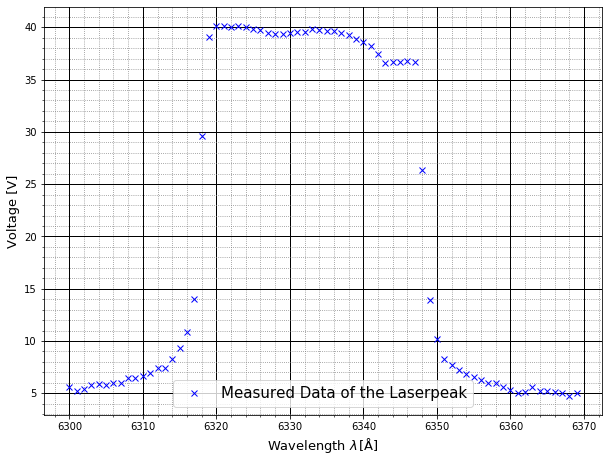

In [446]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

dataL = read('Laserpeak.csv')
dataL = [np.arange(6300,6370,1),dataL[1]]
plt.plot(dataL[0],dataL[1],'x',color='blue',label='Measured Data of the Laserpeak')

###   Label / Title

plt.ylabel(r'Voltage [V]', fontsize=13)
plt.xlabel(r'Wavelength $\lambda\,[\mathrm{\AA}]$', fontsize=13)
#plt.title('Am_Si', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([3900,6000])
#axes.set_ylim([-1,90])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('LPeak.png')
plt.show()

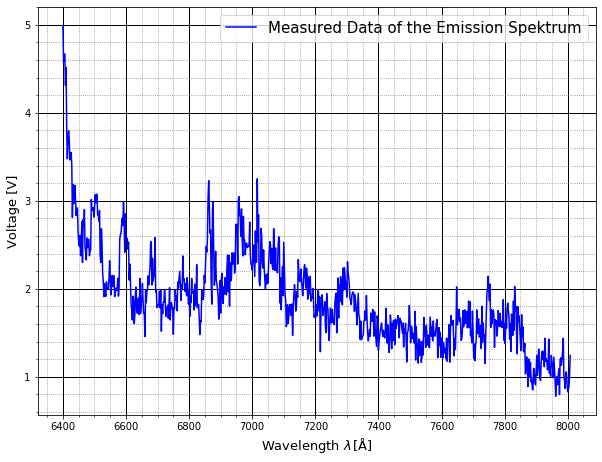

In [407]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

data_e1 = read('emissionsspektrum1.csv')
data_e2 = read('emissionsspektrum2.csv')
data_e4 = read('emissionsspektrum4.csv')
data_e1 = [np.arange(6400,8009,2),data_e1[1]]
data_e2 = [np.arange(6400,8001,1),data_e2[1]]
data_e4 = [np.arange(6400,8009,1),data_e4[1]]


plt.plot(data_e1[0],data_e1[1],color='blue',label='Measured Data of the Emission Spektrum')
#plt.plot(data_e2[0],data_e2[1],color='blue',label='Measured Data of the Emission Spektrum')
#plt.plot(data_e4[0],data_e4[1],color='blue',label='Measured Data of the Emission Spektrum')

###   Label / Title

plt.ylabel(r'Voltage [V]', fontsize=13)
plt.xlabel(r'Wavelength $\lambda\,[\mathrm{\AA}]$', fontsize=13)
#plt.title('Am_Si', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([3900,6000])
#axes.set_ylim([-1,90])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('E1.png')
plt.show()

[6402 6496 6591 6689 6866 6953 7141 7329]


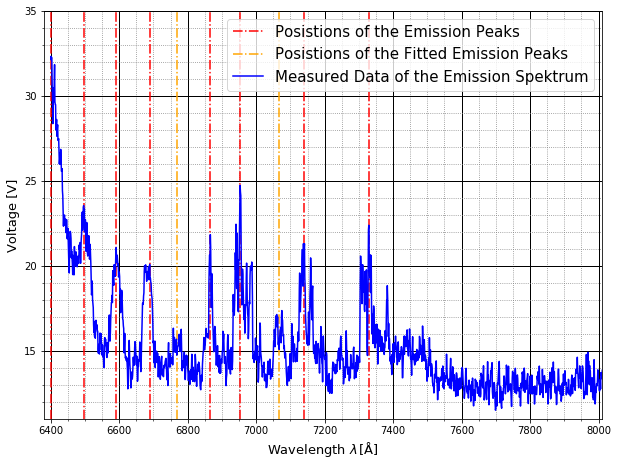

In [505]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

data_e3 = read('emissionsspektrum3.csv')
data_e3 = [np.arange(6400,8037,1),data_e3[1]]

print(data_e3[0][indexes])

for i in range(7):
    plt.plot([data_e3[0][indexes][i],data_e3[0][indexes][i]+0.000001],[0,40],'-.',color='red')
plt.plot([data_e3[0][indexes][7],data_e3[0][indexes][7]+0.000001],[0,40],'-.',color='red',label='Posistions of the Emission Peaks')
plt.plot([7066.611925381982,7066.611925381983],[0,40],'-.',color='orange')
plt.plot([6768.5089130529295,6768.5089130529296],[0,40],'-.',color='orange',label='Posistions of the Fitted Emission Peaks')
plt.plot(data_e3[0],data_e3[1],color='blue',label='Measured Data of the Emission Spektrum')
j = 10

#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][0],28,'4',color='darkviolet',size=20)
#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][1],28,'5',color='darkviolet',size=20)
#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][2],28,'6',color='darkviolet',size=20)
#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][3],28,'7',color='darkviolet',size=20)
#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][4],28,'8',color='darkviolet',size=20)
#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][5],28,'9',color='darkviolet',size=20)
#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][6],28,'10',color='darkviolet',size=20)
#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][7],28,'11',color='darkviolet',size=20)
#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][8],28,'12',color='darkviolet',size=20)
#plt.text([6402+j,6496+j,6591+j,6689+j,6768.5089130529295+j,6866+j,6953+j,7066.611925381982+j,7141+j,7329+j][9],28,'14',color='darkviolet',size=20)

###   Label / Title1

plt.ylabel(r'Voltage [V]', fontsize=13)
plt.xlabel(r'Wavelength $\lambda\,[\mathrm{\AA}]$', fontsize=13)
#plt.title('Am_Si', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([6380,8010])
axes.set_ylim([11,35])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15,loc=1)
plt.savefig('E3_1.png')
plt.show()

(array([12252.821563514553+/-3839.2132791803033,
       35.416487802957995+/-5.071696945043724,
       6768.5089130529295+/-1.319519357703901,
       13.839914061175582+/-0.1214372226663349], dtype=object), 0.5389090683996014) 
 (array([22195.092270012567+/-4763.365925310335,
       33.478217276326305+/-3.2253118805161343,
       7066.611925381982+/-0.8223362736748325,
       13.471826992714666+/-0.1753003714736993], dtype=object), 0.7406429999168258)


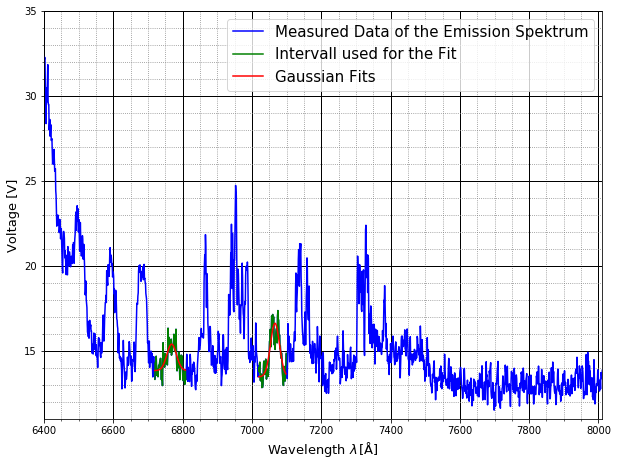

In [412]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

p_e1 = [350,1,7060,0]
p_e2 = [350,1,6770,0]
s = 620
e = 700
s2 = 320
e2 = 410
xnew_e1,ynew_e1 = Gaußfit(data_e3[0][s:e],data_e3[1][s:e],p_e1)
para_e1 = Gaußfit_pm(data_e3[0][s:e],data_e3[1][s:e],p_e1)
xnew_e2,ynew_e2 = Gaußfit(data_e3[0][s2:e2],data_e3[1][s2:e2],p_e2)
para_e2 = Gaußfit_pm(data_e3[0][s2:e2],data_e3[1][s2:e2],p_e2)
print(para_e2,'\n',para_e1)
plt.plot(data_e3[0],data_e3[1],color='blue',label='Measured Data of the Emission Spektrum')

plt.plot(data_e3[0][s:e],data_e3[1][s:e],color='green',label='Intervall used for the Fit')
plt.plot(xnew_e1,ynew_e1,color='red',label='Gaussian Fits')
plt.plot(data_e3[0][s2:e2],data_e3[1][s2:e2],color='green')
plt.plot(xnew_e2,ynew_e2,color='red')
###   Label / Title

plt.ylabel(r'Voltage [V]', fontsize=13)
plt.xlabel(r'Wavelength $\lambda\,[\mathrm{\AA}]$', fontsize=13)
#plt.title('Am_Si', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([6400,8010])
axes.set_ylim([11,35])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('E3_2.png')
plt.show()

In [517]:
P_e = unp.uarray([6402,6496,6591,6689,6768.5089130529295,6866,6953,7066.611925381982,7141,7329],[3,3,3,3,1.319519357703901,3,3,0.8223362736748325,3,3])
for i in range(10):
    print('$','{:L}'.format(((P_e[i]))),'$')

$ 6402.0 \pm 3.0 $
$ 6496.0 \pm 3.0 $
$ 6591.0 \pm 3.0 $
$ 6689.0 \pm 3.0 $
$ 6768.5 \pm 1.3 $
$ 6866.0 \pm 3.0 $
$ 6953.0 \pm 3.0 $
$ 7066.6 \pm 0.8 $
$ 7141.0 \pm 3.0 $
$ 7329.0 \pm 3.0 $


In [518]:
for i in range(10):
    print('$','{:L}'.format((1/(P_e[i]*10e-9))),'$')
print(1/(7250*10e-9))

$ 15620 \pm 7 $
$ 15394 \pm 7 $
$ 15172 \pm 7 $
$ 14950 \pm 7 $
$ 14774.3 \pm 2.9 $
$ 14565 \pm 6 $
$ 14382 \pm 6 $
$ 14151.1 \pm 1.6 $
$ 14004 \pm 6 $
$ 13644 \pm 6 $
13793.103448275862


In [512]:
for i in range(10):
    print('$','{:L}'.format((1/((P_e[i]- l_sys) *10e-9))),'$')

$ 15632 \pm 7 $
$ 15406 \pm 7 $
$ 15184 \pm 7 $
$ 14961 \pm 7 $
$ 14785.3 \pm 3.1 $
$ 14575 \pm 6 $
$ 14393 \pm 6 $
$ 14161.1 \pm 2.0 $
$ 14014 \pm 6 $
$ 13654 \pm 6 $


In [531]:
def vgl(x,y,e):
    print(1)
    return abs(x-y)/e
def error(arr):
    arr_error = []
    arr_value = []
    for i in range(len(arr)):
        arr_error.append(arr[i].std_dev)
        arr_value.append(arr[i].nominal_value)
    return arr_error, arr_value

In [532]:
r_lit = np.array([15602.5068,15394.0768,15186.8608,14980.8588,14776.0708,14572.4968,14370.1368,14168.9908,13969.0588,13572.8368])
p_e, p = error((1/((P_e - l_sys) *10e-9)))


In [533]:
n = vgl(r_lit,p,p_e)

1


In [534]:
n

array([ 3.22859046,  0.83647408,  1.27664256,  3.75629622,  1.26464931,
        0.41215423,  2.78193431,  7.4070635 ,  6.68344501, 13.5883222 ])